# Facial Landmark Detection with OpenCV and DLib

The detection of Facial Landmarks is a technology that allows for the automatic identification and localization of specific facial features in an image or video. This technology is important because it can extract valuable information such as the eyes, eyebrows, nose, mouth, and other distinctive facial features, which has various applications, such as facial recognition and facial expression analysis.

[Dlib](http://dlib.net/) and [OpenCV](https://opencv.org/) were used in this project to detect and display Facial Landmarks in images and videos, with the aspect ratio technique used to mitigate the impact of image scale on the analysis. The aspect ratio technique reduces variability across different image capture conditions by using ratio-based measurements.

Pre-trained models ([Model 68](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2) and [Model 5](http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2)) were downloaded from [dlib.net](http://dlib.net/) for use in this project, and proper attribution and credit are given to the source. For more information on the aspect ratio technique, please refer to the paper: '[Real-Time Eye Blink Detection using Facial Landmarks (Paper)](https://vision.fe.uni-lj.si/cvww2016/proceedings/papers/05.pdf)'. 

This project was undertaken as part of the Computer Vision courses offered by [Alura's Technology school](https://cursos.alura.com.br/formacao-visao-computacional-opencv).


***

## Importing Libs

In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

## Instantiating Model

In [2]:
dlib5_path = 'Classificadores/shape_predictor_5_face_landmarks.dat'
dlib68_path = 'Classificadores/shape_predictor_68_face_landmarks.dat'

dlib5 = dlib.shape_predictor(dlib5_path)
dlib68 = dlib.shape_predictor(dlib68_path)

## Creating a function to detect faces and facial landmarks

In [3]:
face_detector = dlib.get_frontal_face_detector()


def detect_faces(img, n=(68)):
    
    img_ret = img.copy()
    
    pos = face_detector(img_ret, 1)
    if len(pos)==0:
        print('Cannot detect faces')
        return None, None
    
    #print(str(len(pos)) + ' faces detected')
    facial_landmarks = []
    
    for i, r in enumerate (pos):
        cv2.rectangle (img_ret, (r.left(),r.top()), (r.right(),r.bottom()), (255,0,0), 2)
        
        if n==68:
            facial_landmarks.append(np.matrix([[p.x, p.y] for p in dlib68(img_ret, r).parts()]))
        else:
            facial_landmarks.append(np.matrix([[p.x, p.y] for p in dlib5(img_ret, r).parts()]))
    
    return img_ret, facial_landmarks

## Identifying the first face

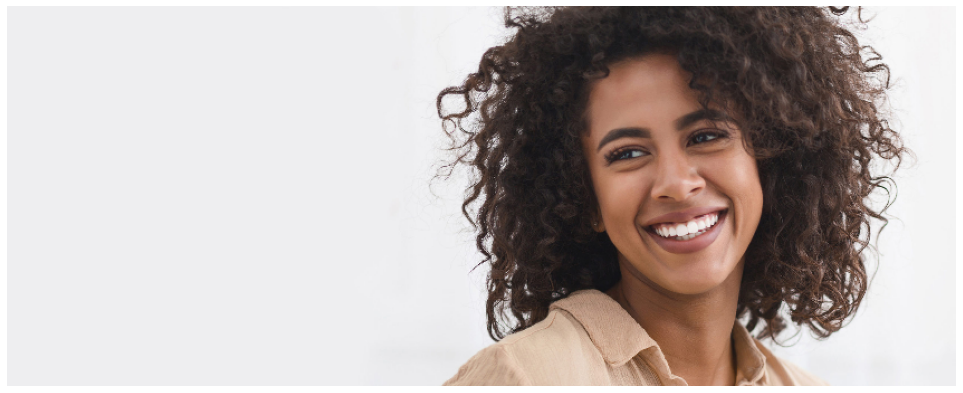

In [4]:
path = 'Imagens/Smiling.jpg'
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (850,340), interpolation=cv2.INTER_LANCZOS4)


plt.rcParams['figure.figsize'] = [17, 10]
plt.axis('off');
plt.imshow(img);

### Plotting the face surrounded with a bounding box.

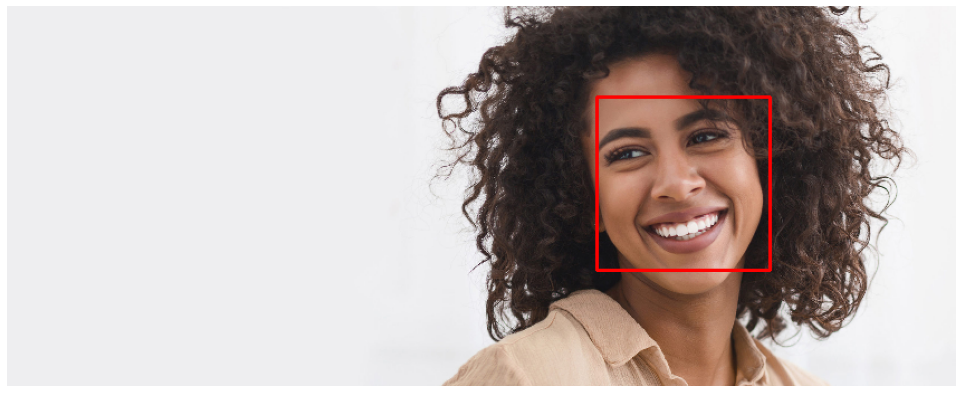

In [5]:
img2 = img.copy()
img2, fl = detect_faces(img2)


plt.rcParams['figure.figsize'] = [17, 10]
plt.axis('off');
plt.imshow(img2);

## Creating a function for plotting each facial landmark

In [6]:
def plot_fl (img, fl_lst, s=1, color_circle=(255,0,0),t = False ,color_font=(255,0,0)):
    for fl in fl_lst:
        for i, coordinates in enumerate(fl):
            p = (coordinates[0,0], coordinates[0,1])
            cv2.circle(img, p, s, color_circle, -1)
            if(t==True):
                cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_font, 2)
    return img

### Testing 5 facial landmark detection

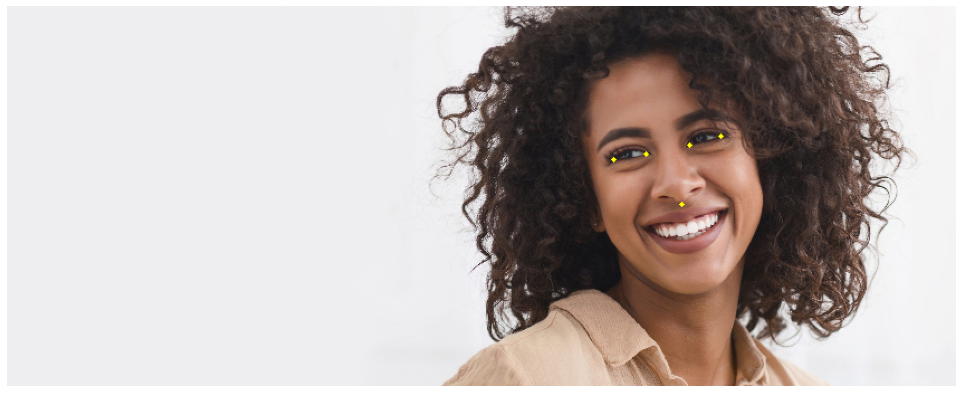

In [7]:
img2 = img.copy()
_, fl = detect_faces(img2,5)


img2 = plot_fl(img2,fl,2,(255,255,0))

plt.rcParams['figure.figsize'] = [17, 10]
plt.axis('off');
plt.imshow(img2);

### Testing 68 facial landmark detection

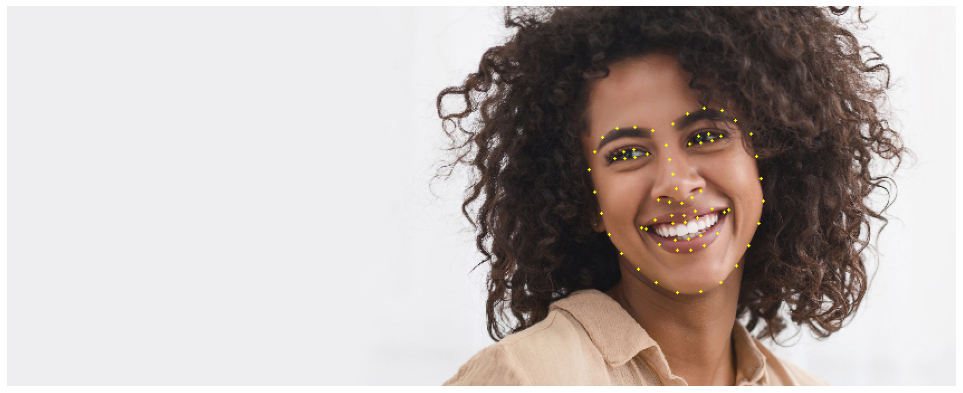

In [8]:
img2 = img.copy()
_, fl = detect_faces(img2,68)


img2 = plot_fl(img2,fl,1,(255,255,0))

plt.rcParams['figure.figsize'] = [17, 10]
plt.axis('off');
plt.imshow(img2);

## Locating each number

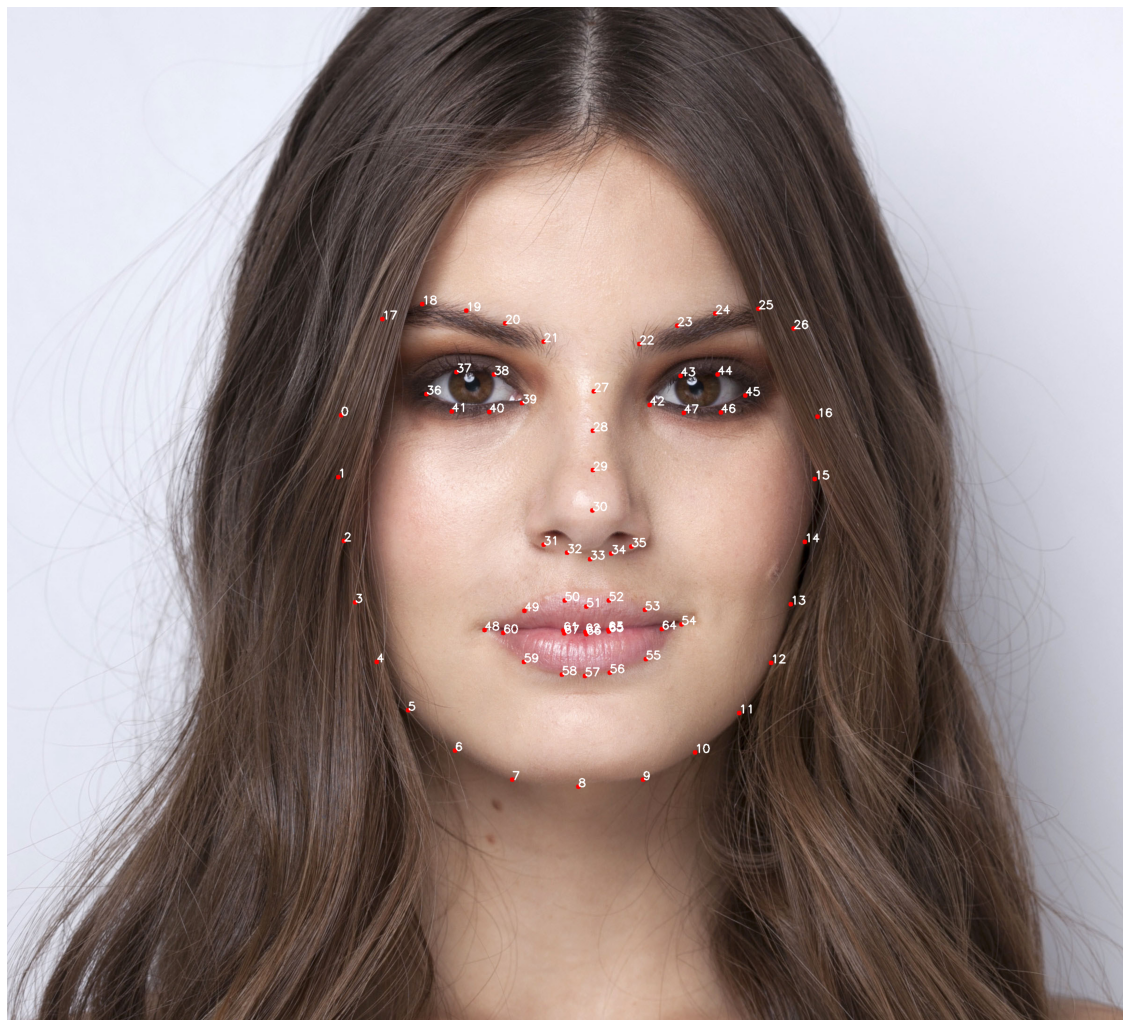

In [9]:
path = 'Imagens/face-closeup.jpg'
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)


img2 = img.copy()
_, fl = detect_faces(img2,68)

img2 = plot_fl(img2,fl,5,(255,0,0), True, (255,255,255))

plt.rcParams['figure.figsize'] = [20, 20]
plt.axis('off');
plt.imshow(img2);

## Aspect ratio measurements

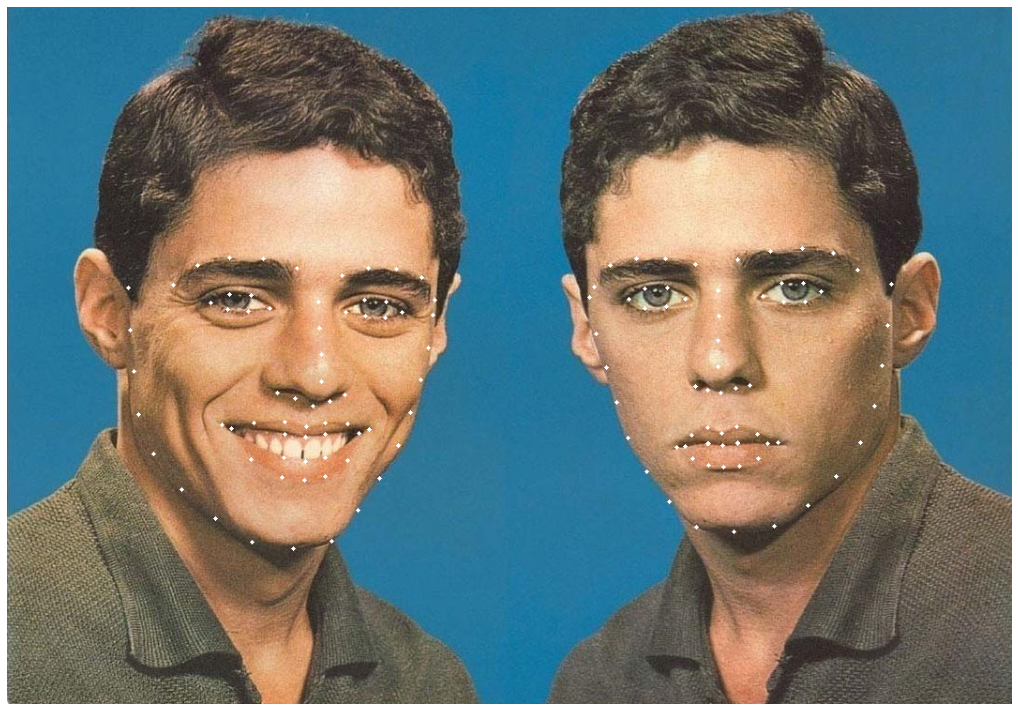

In [10]:
path = 'Imagens/chico-buarque.jpg'
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)


img2 = img.copy()
_, fl = detect_faces(img2,68)

img2 = plot_fl(img2,fl,2,(255,255,255))

plt.rcParams['figure.figsize'] = [18, 18]
plt.axis('off');
plt.imshow(img2);

In [11]:
FACE = list(range(17, 68))
FULL_FACE = list(range(0, 68))
LIPS = list(range(48, 61))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36,42))
LEFT_EYE = list(range(42,48))
NOSE = list(range(27,35))
JAW = list(range(0,17))

### Creating functions for calculating aspect ratio measurements for eyes and mouth

In [12]:
def eye_aspect_ratio(eye):
    a = dist.euclidean(eye[1], eye[5])
    b = dist.euclidean(eye[2], eye[4])
    c = dist.euclidean(eye[0], eye[3])
    eye_aspect_ratio = (a + b)/(2.0 * c)
    return eye_aspect_ratio

def mouth_aspect_ratio(lips):
    a = dist.euclidean(lips[3], lips[9])
    b = dist.euclidean(lips[2], lips[10])
    c = dist.euclidean(lips[4], lips[8])
    d = dist.euclidean(lips[0], lips[6])
    
    mouth_aspect_ratio = (a + b + c)/(3.0*d)
    
    return mouth_aspect_ratio

### Creating functions to plot eyes and mouth

In [13]:
def plot_eyes(img, fl):
    pos = face_detector(img, 1)
    
    if len(pos) == 0:
        return None
    
    for i, p in enumerate(pos):
        lm = fl[i]
        
        coor = cv2.convexHull(lm[LEFT_EYE])
        cv2.drawContours(img, [coor], 0, (255,255,0), 2)
        
        coor = cv2.convexHull(lm[RIGHT_EYE])
        cv2.drawContours(img, [coor], 0, (255,255,0), 2)
    
    return img

def plot_mouth(img, fl):
    pos = face_detector(img, 1)
    
    if len(pos) == 0:
        return None
    
    for i, p in enumerate(pos):
        lm = fl[i]
        
        coor = cv2.convexHull(lm[LIPS])
        cv2.drawContours(img, [coor], 0, (255,255,0), 2)

    return img

### Testing the functions

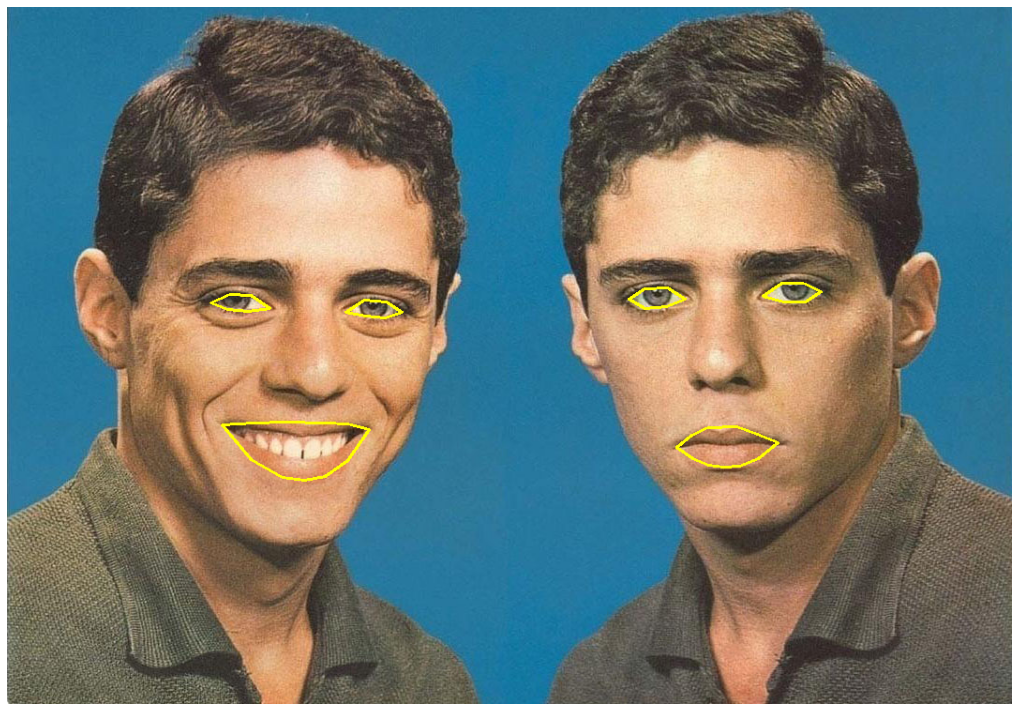

In [14]:
path = 'Imagens/chico-buarque.jpg'
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)


img2 = img.copy()
_, fl = detect_faces(img2,68)

img2 = plot_eyes(img2,fl)
img2 = plot_mouth(img2,fl)

plt.rcParams['figure.figsize'] = [18, 18]
plt.axis('off');
plt.imshow(img2);

In [15]:
aspect_ratio_face1_lefteye = eye_aspect_ratio(fl[0][LEFT_EYE])
aspect_ratio_face1_righteye = eye_aspect_ratio(fl[0][RIGHT_EYE])
aspect_ratio_face1_mouth = mouth_aspect_ratio(fl[0][LIPS])


print('Aspect Ratio for the left face')
print('Left eye: ' + str(aspect_ratio_face1_lefteye))
print('Right eye ' + str(aspect_ratio_face1_righteye))
print('Mouth: ' + str(aspect_ratio_face1_mouth))

Aspect Ratio for the left face
Left eye: 0.32314044424147037
Right eye 0.34187486995417327
Mouth: 0.3643474553326751


In [16]:
aspect_ratio_face2_lefteye = eye_aspect_ratio(fl[1][LEFT_EYE])
aspect_ratio_face2_righteye = eye_aspect_ratio(fl[1][RIGHT_EYE])
aspect_ratio_face2_mouth = mouth_aspect_ratio(fl[1][LIPS])

print('Aspect Ratio for the right face')
print('Left eye: ' + str(aspect_ratio_face2_lefteye))
print('Right eye ' + str(aspect_ratio_face2_righteye))
print('Mouth: ' + str(aspect_ratio_face2_mouth))

Aspect Ratio for the right face
Left eye: 0.28382310609877337
Right eye 0.26378411489573145
Mouth: 0.3673536675243881


## Testing the functions in a video

For this part, a YouTube video was used, which can be found [here](https://www.youtube.com/watch?v=5t_FoFzVcsA). [All credits to CICEM - Centro de Investigação do Comportamento das Emoções](https://www.youtube.com/@cicem-centrodeinvestigacao7570).

### Creating a function to normalize the frames of a video

In [17]:
def image_normalization(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (500, 400))
    return frame

### Creating a function to display the frame of a video 

In [18]:
def plot_video(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

### Reading video, detecting face and plotting aspect ratio measurements for eyes and mouth

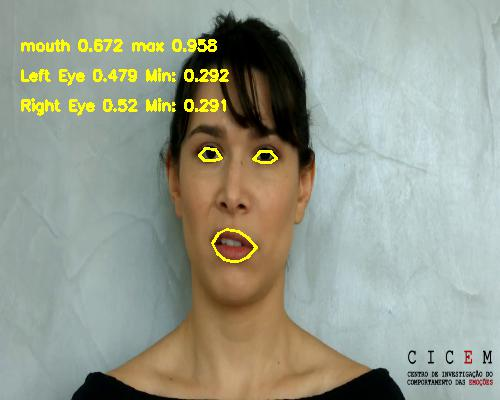

In [ ]:
video = cv2.VideoCapture("Videos/emotions.mp4")

try:
    
    ar_mouth_max = 0
    min_left_eye = 1
    min_right_eye = 1
    
    while(True):
        val, frame = video.read()
        #if video is ok
        if val:
            
            frame = image_normalization(frame)
            _,fl_lst = detect_faces(frame)
            
            
            
            if fl_lst is not None:
                
                #plotting mouth and info
                aspect_ratio_mouth = mouth_aspect_ratio(fl_lst[0][LIPS])
                ar_mouth = round(aspect_ratio_mouth, 3)
            
                if ar_mouth > ar_mouth_max:
                        ar_mouth_max = ar_mouth

                info = "mouth " + str(ar_mouth) + " max " + str(ar_mouth_max)

                frame = plot_mouth(frame, fl_lst)
                cv2.putText(frame, info, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            
                #plotting eyes and infos
                aspect_ratio_eyel = eye_aspect_ratio(fl_lst[0][LEFT_EYE])
                aspect_ratio_eyer = eye_aspect_ratio(fl_lst[0][RIGHT_EYE])
                
                ar_eyel=round(aspect_ratio_eyel, 3)
                ar_eyer=round(aspect_ratio_eyer, 3)
                
                if ar_eyel < min_left_eye:
                    min_left_eye = ar_eyel
                
                if ar_eyer < min_right_eye:
                    min_right_eye = ar_eyer
            
            
                info_le = "Left Eye " + str(ar_eyel) + " Min: " + str(min_left_eye)
                info_re = "Right Eye " + str(ar_eyer) + " Min: " + str(min_right_eye)
            
                frame = plot_eyes(frame, fl_lst)
                
                cv2.putText(frame, info_le, (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
                cv2.putText(frame, info_re, (20, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            
            plot_video(frame)
except KeyboardInterrupt:
    video.release()
    print("Interrupted")